In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Iris Dataset**

The Iris dataset contains 150 samples of iris flowers from three species:
- Setosa
- Versicolor
- Virginica

Each sample has 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width

Our task is to predict the correct species based on these features.

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

**Split Dataset into Train and Test Sets**

We split the dataset into:
- 80% training data for learning
- 20% testing data to evaluate performance

We use `stratify=y` to keep the class distribution balanced in both sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Train a Decision Tree Classifier**

A Decision Tree splits the data based on feature thresholds to make predictions.  
We limit the depth of the tree (`max_depth=3`) to prevent overfitting and to keep the model interpretable.

In [4]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [5]:
dt_pred = dt_model.predict(X_test)

**Train a Random Forest Classifier**

A Random Forest is an ensemble of multiple decision trees.  
Each tree is trained on a random subset of data and features, and the final prediction is made by majority voting.

This approach reduces overfitting and usually improves performance.
We use 100 trees (`n_estimators=100`) with a max depth of 3.

In [6]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [7]:
rf_pred = rf_model.predict(X_test)

**Evaluate Both Models**

We evaluate each model using:
- **Accuracy:** Percentage of correct predictions.
- **Classification Report:** Precision, recall, and F1-score for each class.

This helps us compare the predictive performance of the models.

In [8]:
# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Decision Tree Report:\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9666666666666667
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9666666666666667
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Visualize Confusion Matrices**

A confusion matrix shows how well the model predicts each class.

- Diagonal = correct predictions
- Off-diagonal = misclassifications

We use heatmaps to visualize the confusion matrices of both models and compare their misclassification patterns.

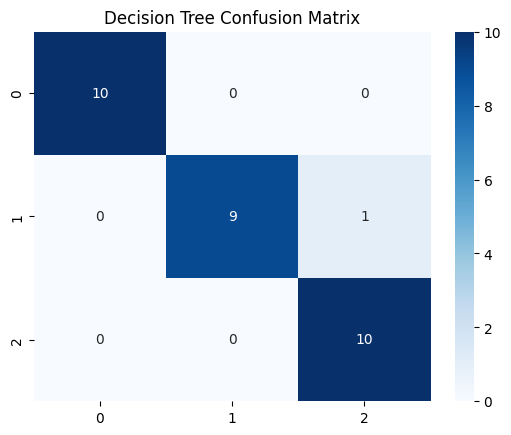

In [10]:
# Decision Tree
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

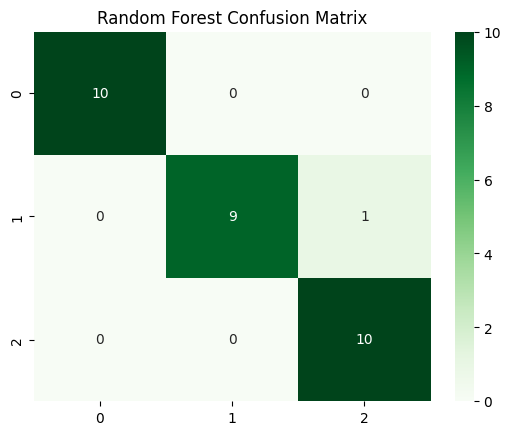

In [11]:
# Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Greens', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

**Compare Feature Importances**

Both models can provide insights into which features were most important for classification.

- **Decision Tree:** Uses one tree's splits to rank features.
- **Random Forest:** Averages feature importances across all trees.

This comparison helps us understand how models use input features.

In [12]:
# Decision Tree
dt_importance = pd.Series(dt_model.feature_importances_, index=X.columns)


In [13]:
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)


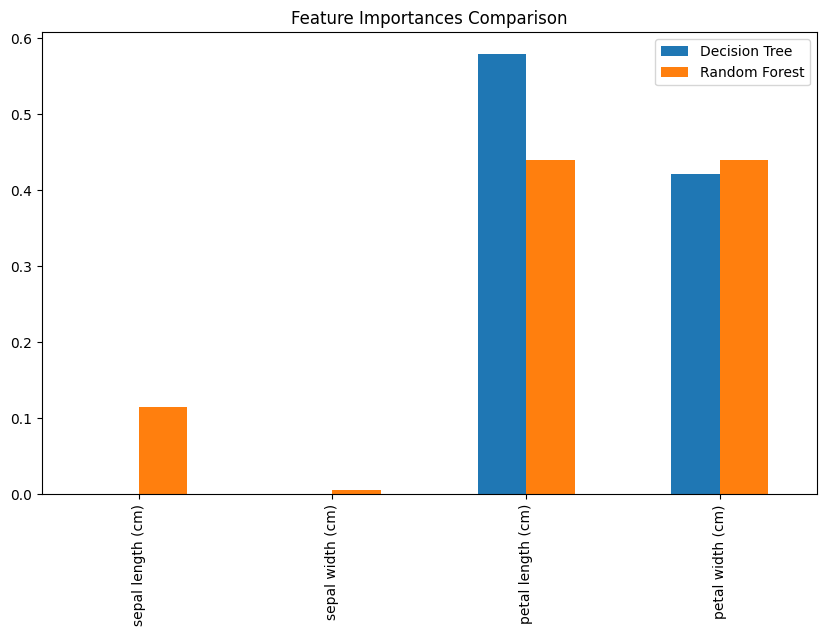

In [14]:
df = pd.DataFrame({'Decision Tree': dt_importance, 'Random Forest': rf_importance})
df.plot(kind='bar', figsize=(10, 6), title="Feature Importances Comparison")
plt.show()

**Observation**

Both the Decision Tree and Random Forest models achieved the **same accuracy (~96%)** on the Iris dataset.

This is expected because:
- The Iris dataset is small and clean.
- Class separation is clear and mostly linear.
- A single tree is enough to model the decision boundaries accurately.

**What does this mean?**

- **Random Forest** is more powerful, but its strength shines on **larger or noisy datasets**.
- In simple, clean datasets like Iris, the difference is minimal.

**When Random Forest will outperform more clearly:**

- When data has noise or outliers
- When overfitting is a risk
- When the number of features or classes is higher
  
**Takeaway**

Although both models gave the same accuracy here, Random Forest remains a better choice for **real-world, complex data** due to its stability and robustness.
